In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import GProfiler

In [3]:
%%time
adata=sc.read_loom('Heiman_Glia16052022.loom')

adata

CPU times: user 25.9 s, sys: 2.42 s, total: 28.3 s
Wall time: 28.7 s


/home/leo/anaconda3/envs/sc-islab/lib/python3.6/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 30730 × 29133
    obs: 'Age', 'Barcode', 'Batch', 'CellType', 'Condition', 'Doublet_Threshold', 'Doublet_score', 'Grade', 'NBB_ID', 'PMI', 'Predicted_doublet', 'Region', 'Sex', 'mt_frac', 'n_counts', 'n_genes', 'obs_names', 'size_factors'
    var: 'feature_types', 'gene_ids', 'n_cells', 'var_names'
    layers: 'counts'

In [4]:
adata

AnnData object with n_obs × n_vars = 30730 × 29133
    obs: 'Age', 'Barcode', 'Batch', 'CellType', 'Condition', 'Doublet_Threshold', 'Doublet_score', 'Grade', 'NBB_ID', 'PMI', 'Predicted_doublet', 'Region', 'Sex', 'mt_frac', 'n_counts', 'n_genes', 'obs_names', 'size_factors'
    var: 'feature_types', 'gene_ids', 'n_cells', 'var_names'
    layers: 'counts'

In [5]:
adata.obs_names=adata.obs.obs_names
adata.var_names=adata.var.var_names

In [6]:
adata.obs.CellType.value_counts()

Astrocyte      14819
Microglia       8588
OPC             5069
Mural           1352
Endothelial      902
Name: CellType, dtype: int64

In [9]:
adata.obs.CellType=adata.obs.CellType.astype('category')
adata.obs.Sex=adata.obs.Sex.astype('category')

In [10]:
#idx_Type=np.argsort(adata.obs.cellType.values)
#adata=adata[idx_Type[0::10],:]

In [11]:
np.random.seed(42)
idxA=np.arange(np.sum(adata.obs.CellType=='Astrocyte'))
np.random.shuffle(idxA)
idxA=idxA[0:1000]

idxU=np.arange(np.sum(adata.obs.CellType=='Microglia'))
np.random.shuffle(idxU)
idxU=idxU[0:1000]

idxM=np.arange(np.sum(adata.obs.CellType=='Mural'))
np.random.shuffle(idxM)
idxM=idxM[0:1000]

idxO=np.arange(np.sum(adata.obs.CellType=='OPC'))
np.random.shuffle(idxO)
idxO=idxO[0:1000]

idxE=np.arange(np.sum(adata.obs.CellType=='Endothelial'))
np.random.shuffle(idxE)
idxE=idxE[0:900]

In [12]:
sub=adata[adata.obs.CellType=='Astrocyte'][idxA].concatenate([adata[adata.obs.CellType=='Microglia'][idxU],
                                                              adata[adata.obs.CellType=='Mural'][idxM],
                                                              adata[adata.obs.CellType=='OPC'][idxO],
                                                              adata[adata.obs.CellType=='Endothelial'][idxE]])

In [13]:
sc.pp.highly_variable_genes(sub, flavor='seurat', n_top_genes=500)

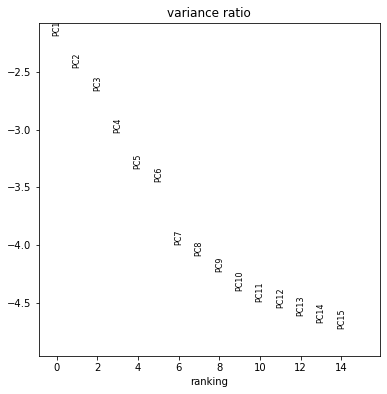

In [14]:
# Calculate the visualizations
plt.rcParams['figure.figsize']=(6,6) #rescale figures

n_pcs=15
sc.pp.pca(sub, n_comps=n_pcs, use_highly_variable=True, svd_solver='arpack')
sc.pl.pca_variance_ratio(sub,n_pcs, log=True)

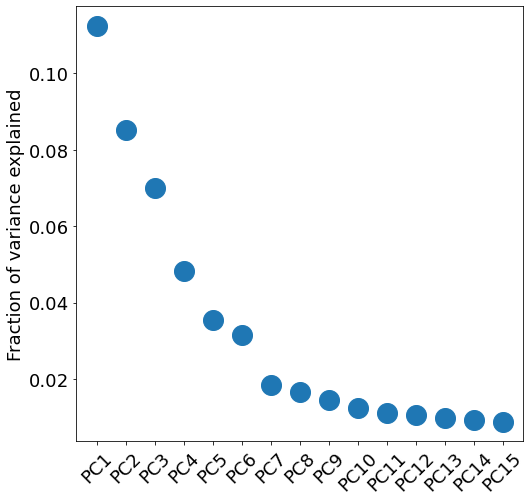

In [15]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
plt.rcParams.update({'font.size': 18})
plt.plot(sub.uns['pca']['variance_ratio'][0:15],'o',markersize=20);
plt.ylabel('Fraction of variance explained')
plt.xticks(ticks=np.arange(15),labels=['PC'+i.astype(str) for i in np.arange(16)[1:]],rotation=45);
#plt.xlabel('PC')

... storing 'CellType' as categorical
... storing 'Condition' as categorical
... storing 'Grade' as categorical
... storing 'NBB_ID' as categorical
... storing 'Region' as categorical
... storing 'feature_types' as categorical


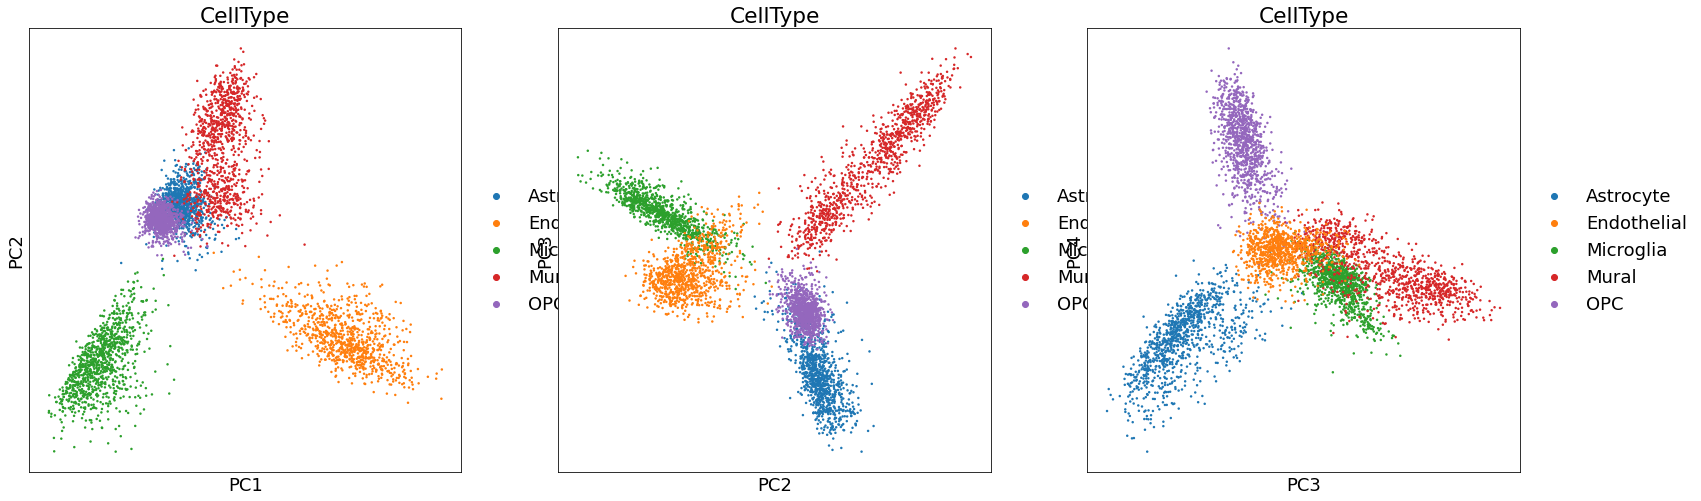

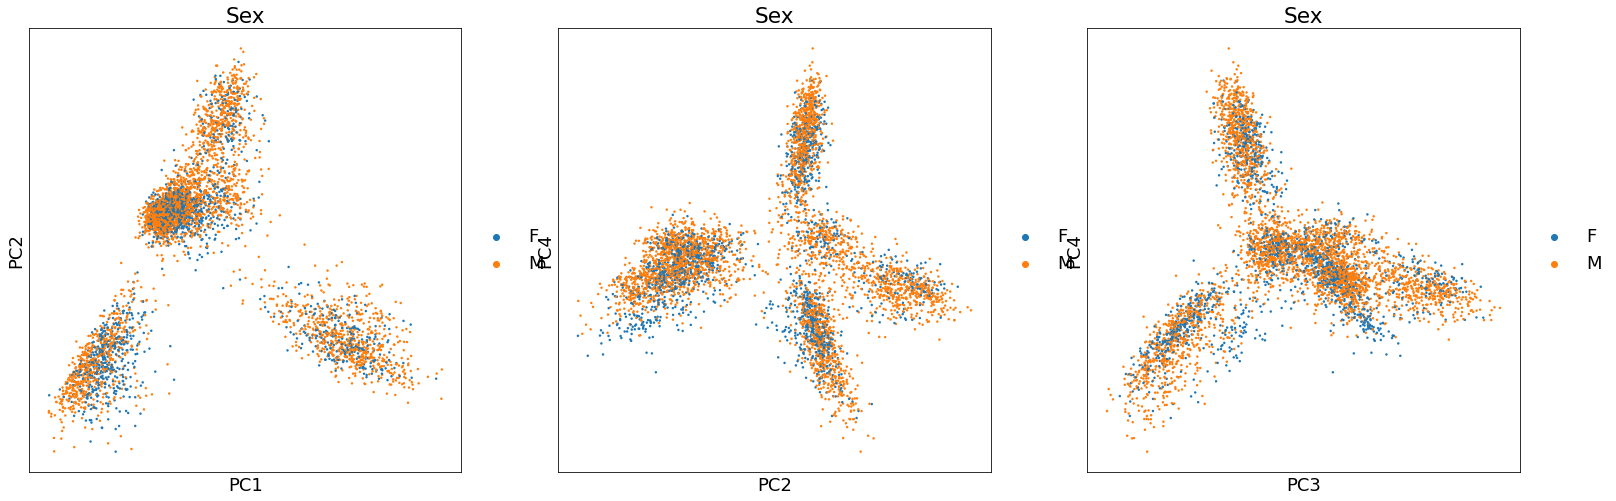

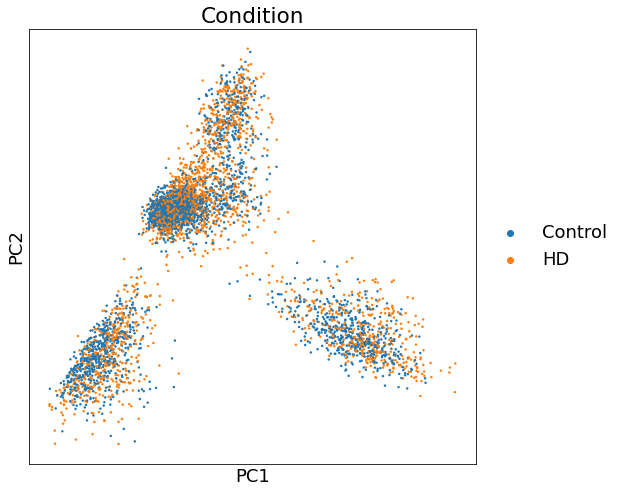

In [16]:
sc.pl.pca_scatter(sub, color='CellType',components=['1,2','2,3','3,4'])
sc.pl.pca_scatter(sub, color='Sex',components=['1,2','2,4','3,4'])
sc.pl.pca_scatter(sub, color='Condition')
#sc.pl.umap(adata, color='cellType')
#sc.pl.umap(adata, color='sex')

In [17]:
%%time
sc.pp.neighbors(sub,n_pcs=10,random_state=42,n_neighbors=4900)
#sc.tl.umap(adata,random_state=42)

CPU times: user 38.5 s, sys: 1.05 s, total: 39.6 s
Wall time: 38.2 s


/home/leo/anaconda3/envs/sc-islab/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  


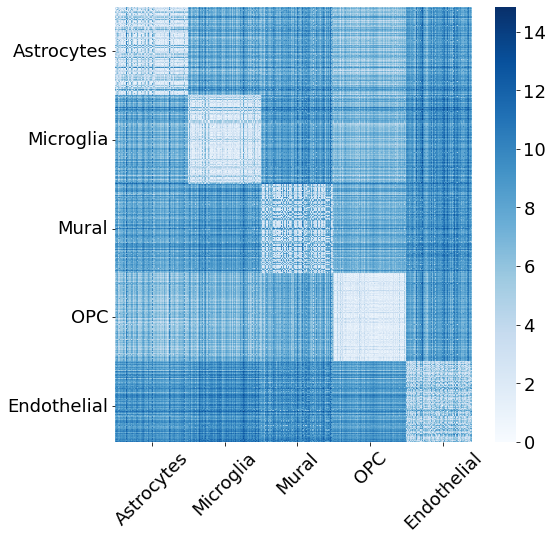

In [18]:
import seaborn as sns
ax1=sns.heatmap(sub.uns['neighbors']['distances'].todense(),cmap='Blues')#,yticklabels=sub.obs['CellType'])
ax1.set_yticks([500,1500,2500,3500,4500]);
ax1.set_yticklabels(['Astrocytes','Microglia','Mural','OPC','Endothelial'],rotation=0);
ax1.set_xticks([500,1500,2500,3500,4500]);
ax1.set_xticklabels(['Astrocytes','Microglia','Mural','OPC','Endothelial'],rotation=45);

In [19]:
len(sub)

4900

In [20]:
idx=np.arange(len(sub))
np.random.shuffle(idx)
A_r=sub.uns['neighbors']['distances'].todense()[idx,:]
A_r=A_r[:,idx]

/home/leo/anaconda3/envs/sc-islab/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  This is separate from the ipykernel package so we can avoid doing imports until


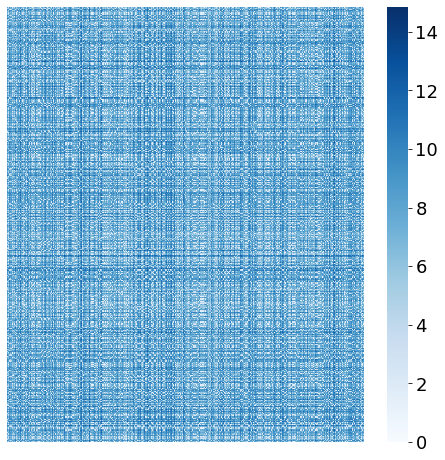

In [21]:

import seaborn as sns
ax1=sns.heatmap(A_r,cmap='Blues')#,yticklabels=sub.obs['CellType'])
ax1.set_yticks([]);
#ax1.set_yticklabels(['Astrocytes','Microglia','Mural','OPC','Endothelial'],rotation=0);
ax1.set_xticks([]);
#ax1.set_xticklabels(['Astrocytes','Microglia','Mural','OPC','Endothelial'],rotation=45);

In [23]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)


In [25]:
X=A_r#sub.uns['neighbors']['distances'].todense()
#X=np.abs(X-np.max(X))
X_transformed = embedding.fit_transform(X[0::3])

In [26]:
dfMDS=pd.DataFrame(X_transformed,columns=['MDS1','MDS2'])
dfMDS['Type']=sub.obs.CellType.values[idx][0::3]

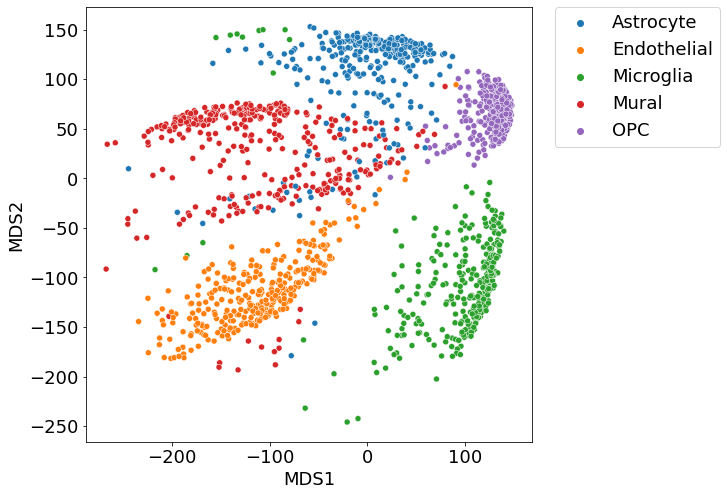

In [27]:
sns.scatterplot(data=dfMDS,x='MDS1',y='MDS2',hue='Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [106]:
sub.uns['neighbors']['connectivities']

/home/leo/anaconda3/envs/sc-islab/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  """Entry point for launching an IPython kernel.


<4900x4900 sparse matrix of type '<class 'numpy.float32'>'
	with 24005100 stored elements in Compressed Sparse Row format>

In [ ]:
%%time
sc.pp.neighbors(sub,n_pcs=10,random_state=42,n_neighbors=4900)
#sc.tl.umap(adata,random_state=42)

/home/leo/anaconda3/envs/sc-islab/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  """Entry point for launching an IPython kernel.


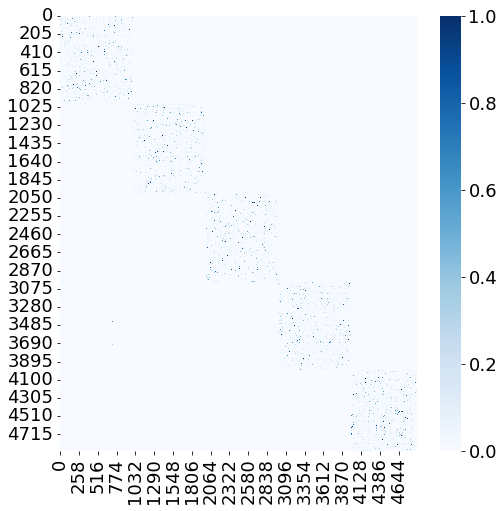

In [107]:
ax1=sns.heatmap(sub.uns['neighbors']['connectivities'].todense(),cmap='Blues')#,yticklabels=sub.obs['CellType'])

In [108]:
%%time
sc.pp.neighbors(sub,n_pcs=10,random_state=42,n_neighbors=1000)
#sc.tl.umap(adata,random_state=42)

CPU times: user 8.32 s, sys: 1.87 s, total: 10.2 s
Wall time: 8.93 s


/home/leo/anaconda3/envs/sc-islab/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  """Entry point for launching an IPython kernel.


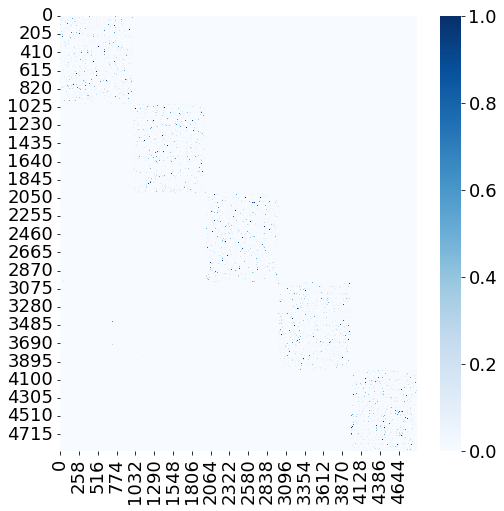

In [109]:
ax1=sns.heatmap(sub.uns['neighbors']['connectivities'].todense(),cmap='Blues')#,yticklabels=sub.obs['CellType'])

In [110]:
%%time
sc.pp.neighbors(sub,n_pcs=10,random_state=42,n_neighbors=100)
#sc.tl.umap(adata,random_state=42)

CPU times: user 1.89 s, sys: 780 ms, total: 2.67 s
Wall time: 1.24 s


/home/leo/anaconda3/envs/sc-islab/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  """Entry point for launching an IPython kernel.


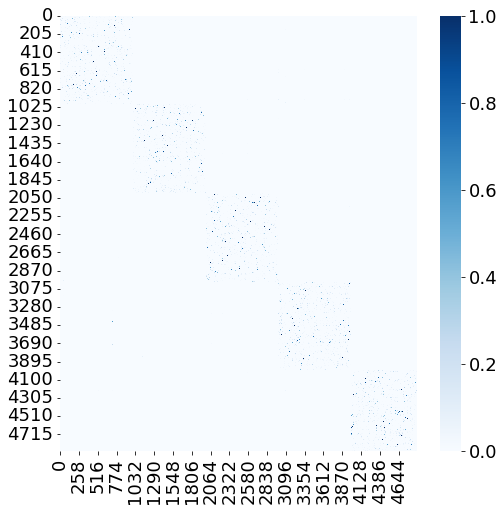

In [111]:
ax1=sns.heatmap(sub.uns['neighbors']['connectivities'].todense(),cmap='Blues')#,yticklabels=sub.obs['CellType'])

In [112]:
%%time
sc.pp.neighbors(sub,n_pcs=10,random_state=42,n_neighbors=15)
#sc.tl.umap(adata,random_state=42)

CPU times: user 1.19 s, sys: 908 ms, total: 2.1 s
Wall time: 794 ms


/home/leo/anaconda3/envs/sc-islab/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  """Entry point for launching an IPython kernel.


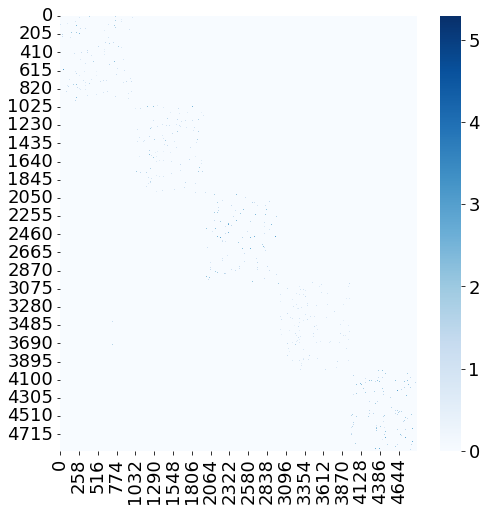

In [114]:
ax1=sns.heatmap(sub.uns['neighbors']['distances'].todense(),cmap='Blues')#,yticklabels=sub.obs['CellType'])